# Lab 5 - Probability and Simpson’s Paradox
### Coding Wildcats
### Authors: 
  - Danielle Stea
  - Erika Kirpatrick
  - Kai Shuen Neo
  - Sahand Motameni
  - Rohit Kalakala
### Date: 11-26-24

::: callout-important
This is a *Team* Lab, meaning you can and should work with your project team on it.
:::

## Packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Introduction

In this lab you'll review and get practice with a variety of concepts, methods, and tools you've encountered thus far, with a focus on misrepresentation and ethics.

## Learning objectives

By the end of the lab, you will...

-   Calculate single event, conditional, and "and" probabilities.
-   Interpret probabilities in the context of the problem.
-   Display a fundamental understanding of Simpson's Paradox.
-   Practice teamwork and collaboration on GitHub.

## Guidelines

As we've discussed in lecture, your plots should include an informative title, axes should be labeled, and careful consideration should be given to aesthetic choices.

::: callout-note
Remember that continuing to develop a sound workflow for reproducible data analysis is important as you complete the lab and other assignments in this course.
There will be periodic reminders in this assignment to remind you to **Run all, commit, and sync** your changes to GitHub.
You should have at least 3 commits with meaningful commit messages by the end of the assignment.
:::

# Getting started

All team members should clone the team GitHub repository for the lab.
Then, one team member should edit the document Markdown cell by adding the team name to the `Team name` field and adding the names of the team members contributing to lab to the `Authors` field.
Hopefully that's everyone, but if someone doesn't contribute during the lab session or throughout the week before the deadline, their name should not be added.
If you have 4 members in your team, you can delete the line for the 5th team member.
Then, this team member should render the document and commit and push the changes.
All others should **not** touch the document at this stage.

``` markdown
# Lab 5 - Probability and Simpson’s Paradox
### Team name: Coding Wildcats
### Authors: 
  - Danielle Stea
  - Erika Kirpatrick
  - Kai Shuen Neo
  - Sahand Motameni
  - Rohit Kalakala
### Date: 11-26-24
```


# Questions

::: callout-important
Pick another member of the team write the answer to Part 1.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::


## Part 1 - Probability and you

### Question 1

We use probabilities all the time when making decisions.
*As a group*, provide *two* real world examples of when you've used probability to make decisions in your every day life.
Think critically.
Be creative.

ANSWER: We often use probability when playing dice games. Since we know that is it most likely to roll a 7, and least likely to roll a 1 or 12, we use that knowledge to help make my game play better.
We also use probability every day that we check our weather app. The chance of rain for example is a probabilty. 


::: callout-important
After the team member working on Part 1 renders, commits, and pushes, another team member should pull their changes and render the document.
Then, they should write the answer to Part 2.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::

## Part 2 - Risk of coronary heart disease

This data set is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
We want to examine the relationship between various health characteristics and the risk of having heart disease.

### Question 2

Load in the data set called `education-disease` and answer the following questions below.

In [2]:
edu_disease = pd.read_csv('data/education-disease.csv')

### Question 3

How many levels of education are there in these data?
How many levels of disease are there?
**Hint:** The `unique()` function might be helpful.


In [3]:
print(edu_disease['education'].unique())
print(edu_disease['diabetes'].unique())
print(edu_disease['prevalentStroke'].unique())
print(edu_disease['prevalentHyp'].unique())
print("Levels in education: 4")
print("Levels in disease: 6, specifically there are 2 levels each of the 3 columns, \nthese columns are diabetes, prevalentStroke, and prevalentHyp.")

[ 4.  2.  1.  3. nan]
[0 1]
[0 1]
[0 1]
Levels in education: 4
Levels in disease: 6, specifically there are 2 levels each of the 3 columns, 
these columns are diabetes, prevalentStroke, and prevalentHyp.


### Question 4

Convert the data to a two-way table where each cell is the number of people falling into each combination of Disease and Education.
**Hint:** Use `groupby` and `pivot_table`.
Your answer should be a 4x3 data frame with counts in each cell.


In [4]:
disease = ['diabetes', 'prevalentStroke', 'prevalentHyp']
edu_disease_sum = pd.pivot_table(data=edu_disease,values=disease,index='education',aggfunc='count',margins=False)

Using the summary table you created above, answer the remaining questions.
You do not have to use Python functions for your calculations, you can use Python as a calculator using the values from the summary table.
Make sure to show your work, i.e., instead of reporting just the final answer, use Python to calculate that in a way we can see the counts you've used along the way.


### Question 5

What is the probability of a random individual having high school or GED education and not being high risk for cardiovascular disease?

In [7]:
high_sch_or_ged = len(edu_disease.query('education==1.0'or'education==2.0'))


not_being_high_risk_for_cd = len(edu_disease) - 4135 = 105

Probability of random individual having (high school / ged education) & not being high risk for card disease
= (1720/4240) * (105/4240)
= 0.40566 * 0.024764
= 0.0100458

### Question 6

What is the probability that a random individual who is already high risk for cardiovascular disease has a college education?

In [9]:
high_risk_individuals = edu_disease[edu_disease['TenYearCHD'] == 1]
high_risk_college_educated = len(high_risk_individuals[high_risk_individuals['education'].isin([3.0, 4.0])])
total_high_risk_individuals = len(high_risk_individuals)
probability = high_risk_college_educated / total_high_risk_individuals
print("High-risk individuals with college education:", high_risk_college_educated)
print("Total high-risk individuals:", total_high_risk_individuals)
print("Probability that a high-risk individual has a college education:", probability)

High-risk individuals with college education: 158
Total high-risk individuals: 644
Probability that a high-risk individual has a college education: 0.2453416149068323


::: callout-important
After the team member working on Part 2 renders, commits, and pushes, another team member should pull their changes and render the document.
Then, they should write the answer to Part 3.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::

## Part 3 - Bike rentals

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.
You are tasked to investigate the relationship between the temperature outside and the number of bikes rented in the Washington DC area between the years 2011 and 2022.
You will be investigating data for the months June, July, September, and November.

Below is a list of variables and their definitions:

| Variable  | Definition                                                                     |
|------------------|------------------------------------------------------|
| `season`  | Numerical representation of Spring (2), Summer (3), and Fall (4)               |
| `year`    | Numerical representation of 2011 (0) or 2012 (1)                               |
| `month`   | Month in which data were collected                                             |
| `holiday` | Indicator variable for whether data were collected on a holiday (1) or not (0) |
| `weekday` | Numerical representation of day of week                                        |
| `temp`    | Temperature in Celsius                                                         |
| `count`   | Number of bike rentals for that day                                            |

### Question 7

(a) Read in the `bike` data.
    Then, create a scatter plot that investigates the relationship between the number of bikes rented and the temperature outside.
    Include a straight line of best fit to help discuss the discovered relationship.
    Summarize your findings in 2-3 sentences.

(b) Another researcher suggests to look at the relationship between bikes rented and temperature by each of the four months of interest.
    Recreate your plot in part a, and color the points by month.
    Include a straight line for each of the four months to help discuss each month's relationship between bikes rented and temperature.
    In 3-4 sentences, summarize your findings.

In [3]:
bike_data = pd.read_csv('data/bike.csv')

bike_data.head()

,season,year,month,holiday,weekday,temp,count
0,2,0,6,0,3,27.915849,3974
1,2,0,6,0,4,25.605000,4968
2,2,0,6,0,5,21.140000,5312
3,2,0,6,0,6,21.845000,5342
4,2,0,6,0,0,22.471651,4906


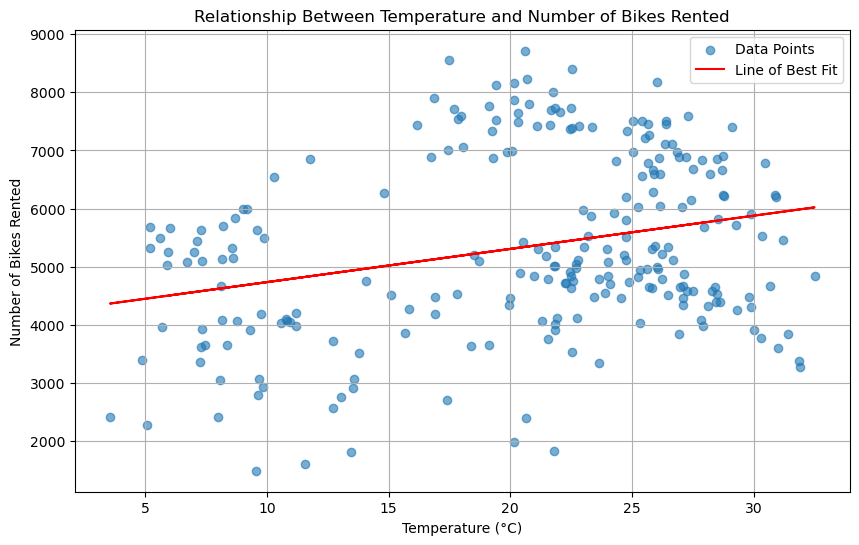

In [ ]:
import numpy as np


temp = bike_data['temp']

count = bike_data['count']



plt.figure(figsize=(10, 6))

plt.scatter(temp, count, alpha=0.6, label='Data Points')

plt.title('Relationship Between Temperature and Number of Bikes Rented')

plt.xlabel('Temperature (°C)')

plt.ylabel('Number of Bikes Rented')



coefficients = np.polyfit(temp, count, 1)

polynomial = np.poly1d(coefficients)

line_of_best_fit = polynomial(temp)

plt.plot(temp, line_of_best_fit, color='red', label='Line of Best Fit')

plt.legend()

plt.grid(True)

plt.show()

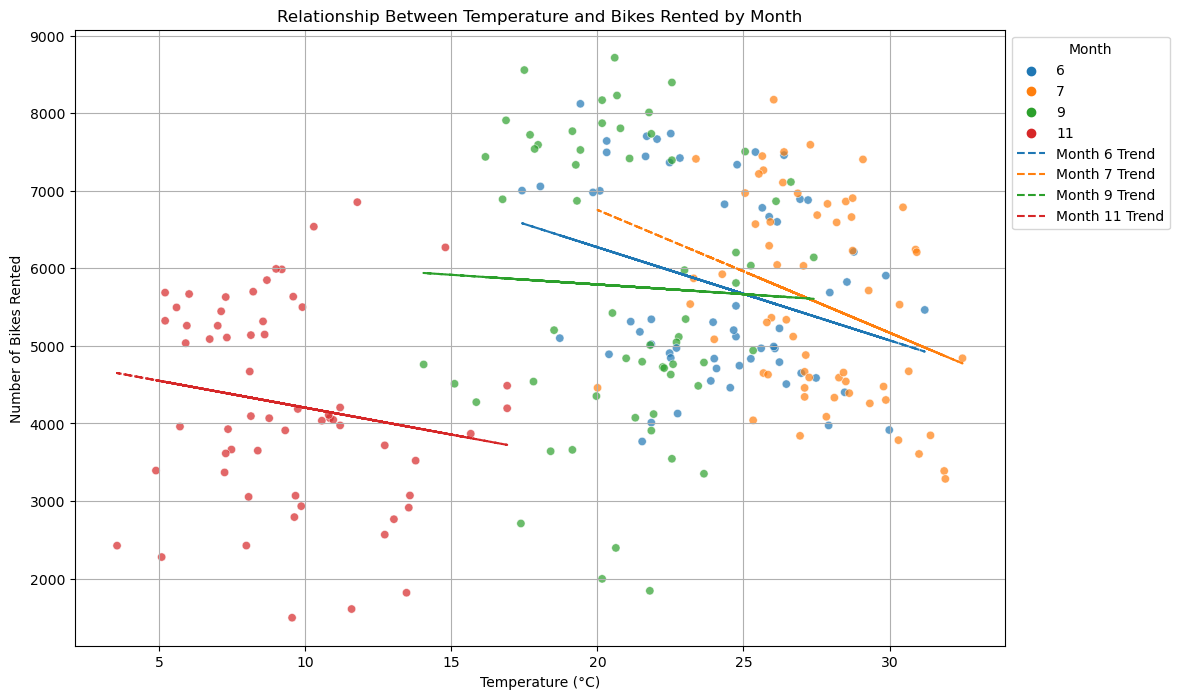

In [ ]:
months = bike_data['month']

unique_months = sorted(months.unique())



plt.figure(figsize=(12, 8))

sns.scatterplot(x='temp', y='count', hue='month', palette='tab10', data=bike_data, alpha=0.7)





for month in unique_months:

    month_data = bike_data[bike_data['month'] == month]

    coefficients = np.polyfit(month_data['temp'], month_data['count'], 1)

    polynomial = np.poly1d(coefficients)

    plt.plot(

        month_data['temp'],

        polynomial(month_data['temp']),

        label=f'Month {month} Trend',

        linestyle='--'

    )



plt.title('Relationship Between Temperature and Bikes Rented by Month')

plt.xlabel('Temperature (°C)')

plt.ylabel('Number of Bikes Rented')

plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)

plt.show()

Although the overall trend shows a positive relationship between temperature and bike rentals, examining the trend within each individual month reveals a negative relationship. This inverse pattern might occur because higher temperatures within a specific month could signal unusually hot days, deterring outdoor activity and bike usage. Additionally, variations in weather conditions, like heat waves or humidity levels, might explain why bike rentals decrease as temperatures rise within certain months.

Please watch the following video on Simpson's Paradox [here](https://www.youtube.com/watch?v=ebEkn-BiW5k).
After you do, please answer the following questions.

### Question 8

In your own words, summarize Simpson's Paradox in 2-3 sentences.

### Question 9

Compare and contrast your findings from part (a) and part (b).
What's different?

### Question 10

Think critically about your answer to part d.
What other context from this study could be creating this paradox?
That is, identify a potential confounding

# Closing an issue with a commit

Go to your GitHub repository, you will see an issue with the title "Learn to close an issue with a commit".

Your goal is to close this issue with a commit to practice this workflow, which is the workflow you will use when you are addressing feedback on your projects.

-   Go to the relevant section in your lab .ipynb file.
-   Delete the sentence that says "Delete me".
-   Render the document.
-   Commit your changes from the git tab with the commit message *"Delete sentence, closes #1."*
-   Push your changes to your repo and observe that the issue is now closed and the commit associated with this move is linked from the issue.

GitHub allows you to close an issue directly with commits if the commit uses one of the following keywords followed bu the issue number (which you can find next to the issue title): close, closes, closed, fix, fixes, fixed, resolve, resolves, and resolved.


# Wrap-up

## Submission

::: callout-warning
Before you wrap up the assignment, make sure all of your documents are updated on your GitHub repo.
We will be checking these to make sure you have been practicing how to commit and push changes.

You must turn in the .ipynb file by the submission deadline to be considered "on time".
:::

::: callout-important
## Checklist

Make sure you have:

-   attempted all questions
-   run all code in your Jupyter notebook
-   committed and pushed everything to your GitHub repository such that the Git pane in VS Code is empty
:::

## Grading

The lab is graded out of a total of 50 points.

On Questions 1 through 10, you can earn up to 5 points on each question:

-   5: Response shows excellent understanding and addresses all or almost all of the rubric items.

-   4: Response shows good understanding and addresses most of the rubric items.

-   3: Response shows understanding and addresses a majority of the rubric items.

-   2: Response shows effort and misses many of the rubric items.

-   1: Response does not show sufficient effort or understanding and/or is largely incomplete.

-   0: No attempt.
